In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Economic Indicators:**
1. 15-Year Fixed Rate Mortgage Average in the United States:
https://fred.stlouisfed.org/series/MORTGAGE15US

2. 30-Year Fixed Rate Mortgage Average in the United States: 
https://fred.stlouisfed.org/series/MORTGAGE30US

3. 5/1-Year Adjustable Rate Mortgage Average in the United States
https://fred.stlouisfed.org/series/MORTGAGE5US

4. Unemployment Rate:
https://fred.stlouisfed.org/series/DENV708URN

5. New Private Housing Units Authorized by Building Permits-1-Unit Structures
https://fred.stlouisfed.org/series/DENV708BP1FHSA

6. New Private Housing Structures Authorized by Building Permits: 
https://fred.stlouisfed.org/series/DENV708BPPRIVSA

7. Average Hourly Earnings of All Employees：
https://fred.stlouisfed.org/series/SMU08197400500000003SA

8. Average Weekly Earnings of All Employees: 
https://fred.stlouisfed.org/series/SMU08197400500000011SA



**Housing Market Indicators:**

Descriptions Available on realtors.com: https://www.realtor.com/research/data/

1. Market Hotness: Demand Score: https://fred.stlouisfed.org/series/DESCMSA19740

2. Market Hotness: Supply Score: https://fred.stlouisfed.org/series/SUSCMSA19740

1. Median Listing Price: https://fred.stlouisfed.org/series/MEDLISPRI19740

2. Average Listing Price: https://fred.stlouisfed.org/series/AVELISPRI19740

3. Median Home Size in Square Feet: https://fred.stlouisfed.org/series/MEDSQUFEE19740

4. Median Listing Price per Square Feet: https://fred.stlouisfed.org/series/MEDLISPRIPERSQUFEE19740

5. Active Listing Count: https://fred.stlouisfed.org/series/ACTLISCOU19740

6. Median Days on Market: https://fred.stlouisfed.org/series/MEDDAYONMAR19740

7. New Listing Count: https://fred.stlouisfed.org/series/NEWLISCOU19740

8. Price Increased Count: https://fred.stlouisfed.org/series/PRIINCCOU19740

9. Price Reduced Count: https://fred.stlouisfed.org/series/PRIREDCOU19740





# Data Path

In [2]:
region_name = "denver/"
area_name = 'denver-aurora-lakewood, co'

# base data set
mls_path = region_name + "data/mls/listing_dates_with_ct.csv"

# google trends
google_trend_path = region_name + "data/google_trends/google_trends_scaled.csv"

# housing market metrics
housing_metric_path = region_name + "data/housing_metrics/RDC_Inventory_Core_Metrics_Metro_History.csv"
housing_hotness_path = region_name + "data/housing_metrics/RDC_Inventory_Hotness_Metrics_Metro_History.csv"

# economic indicators
m15_path = region_name + "data/econ_indicators/15yearmortgage.csv"
m30_path = region_name + "data/econ_indicators/30yearmortgage.csv"
m51_path = region_name + "data/econ_indicators/51yearmortgage.csv"
unemployment_path = region_name + "data/econ_indicators/unemployment.csv"
avg_hour_salary_path = region_name + "data/econ_indicators/avg_hourly_earning.csv"
avg_week_salary_path = region_name + "data/econ_indicators/avg_weekly_earning.csv"
building_path = region_name + "data/econ_indicators/building_permit.csv"
building_1unit_path = region_name + "data/econ_indicators/building_permit_1unit.csv"


# Base Listing Data

In [3]:
# url = 'https://drive.google.com/file/d/19_JeXh3Ost8q7XyX-ZmnDPLCLKy7HC00/view?usp=sharing'
# file_id = url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
# df = pd.read_csv(dwn_url)
# df.head()

In [4]:
df = pd.read_csv(mls_path)
df.head()

,property_id,zipcode,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,current_status,sale_price,geometry,index_right,ct_key
0,666680976,80113,39.65232,-104.97613,2016-03-01,NaN,NaN,2016-03-01,NaN,Expired,NaN,POINT (-104.97613 39.65232),10693.0,8.005006e+09
1,138826052,80123,39.62523,-105.08648,2016-03-01,NaN,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.08648 39.62523),9869.0,8.059012e+09
2,666683709,80204,39.74122,-105.05241,2016-03-01,NaN,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.05241 39.74122),10476.0,8.031001e+09
3,137981678,80241,39.91465,-104.93076,2016-03-01,2016-04-21,NaN,NaN,NaN,Sale,320000.0,POINT (-104.93076 39.91465),9719.0,8.001009e+09
4,410875086,80202,39.74783,-104.98640,2016-03-01,2016-05-02,NaN,NaN,NaN,Sale,475000.0,POINT (-104.9864 39.74783),10465.0,8.031002e+09


In [5]:
df.loc[:, 'list_date_m'] = pd.to_datetime(df['list_date']).dt.to_period('M')
df.loc[:, 'sale_date_m'] = pd.to_datetime(df['sale_date']).dt.to_period('M')

num_listings_ct = df.dropna(subset=['list_date_m']).groupby(['list_date_m']).count()[['property_id']].reset_index()
num_listings_ct = num_listings_ct.rename(columns={'property_id':'ct_listings', 'list_date_m':'month'})\

num_sales_ct = df.dropna(subset=['sale_date_m']).groupby(['sale_date_m']).count()[['property_id']].reset_index()
num_sales_ct = num_sales_ct.rename(columns={'property_id':'ct_sales', 'sale_date_m':'month'})

num_sales_listings = pd.merge(num_listings_ct, num_sales_ct, left_on=['month'], right_on=['month'], how='left')
num_sl = num_sales_listings.fillna(0.)
num_sl = num_sl.sort_values('month')

#fix outlier value
num_sl.iloc[39,1] = (9233 + 13593) / 2
num_sl = num_sl[:-1]

#num_sl['month'] = pd.to_datetime(num_sl['month'].astype(str))
num_sl

,month,ct_listings,ct_sales
0,2016-03,12897,5242
1,2016-04,10652,5554
2,2016-05,9340,6313
3,2016-06,9525,6909
4,2016-07,8170,6408
5,2016-08,7697,6614
6,2016-09,6950,6109
7,2016-10,5371,5599
8,2016-11,3966,5302
9,2016-12,2768,5156


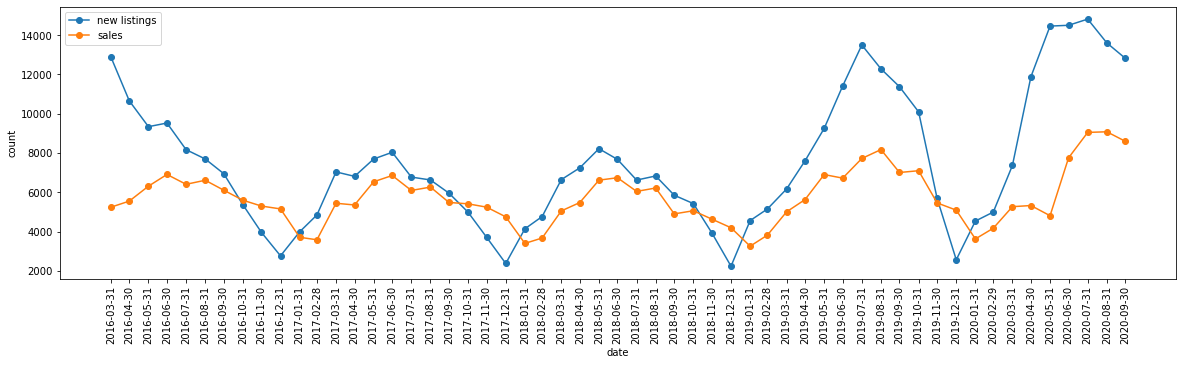

In [6]:
plt.figure(figsize=(20,5))
plt.plot_date(num_sl['month'], num_sl['ct_listings'], ls='-', label='new listings')
plt.plot_date(num_sl['month'], num_sl['ct_sales'], ls='-', label='sales')
plt.xticks(num_sl['month'], rotation=90)
plt.ylabel('count')
plt.xlabel('date')
plt.legend()
plt.show()

In [7]:
def econ_visual(path, label, num_sl, diffy=False):
    df_md = pd.read_csv(path)
    df_md['DATE'] = pd.to_datetime(df_md['DATE']).dt.to_period('M')
    if diffy:
        fig, ax1 = plt.subplots(figsize=(15,5))
        ax1.set_title(label)
        ax1.set_xlabel('date')
        ax1.set_ylabel('count')
        ax1.tick_params('x', labelrotation=45) 
        ax1.set_xticks(range(len(num_sl['month'])))
        ax1.set_xticklabels(num_sl['month'])
        ax1.plot_date(num_sl['month'], num_sl['ct_listings'], ls='-', label='new listings', color='blue')
        ax1.plot_date(num_sl['month'], num_sl['ct_sales'], ls='-', label='sales')
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.set_ylabel(label)
        ax2.plot_date(df_md['DATE'], df_md.iloc[:, 1], ls='-', label=label, color='red')
        # ax2.set_xticks(range(len(num_sl['month'])))
        # ax2.set_xticklabels(num_sl['month'])
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')    
          
    else:
        fig, ax1 = plt.subplots(figsize=(15,5))
        ax1.set_title(label)
        ax1.set_xlabel('date')
        ax1.set_ylabel('count')
        ax1.plot_date(num_sl['month'], num_sl['ct_listings'], ls='-', label='new listings', color='blue')
        ax1.plot_date(num_sl['month'], num_sl['ct_sales'], ls='-', label='sales')
        ax1.plot_date(df_md['DATE'], df_md.iloc[:, 1], ls='-', label=label, color='red')
        ax1.tick_params('x', labelrotation=45) 
        #ax1.set_xticks(range(len(num_sl['month'])))
        #ax1.set_xticklabels(num_sl['month'])
        ax1.legend(loc='best')
        #ax1.xaxis.set_major_formatter(myFmt)
    fig.tight_layout()
    plt.show()
    
    
def housing_visual(housing_metric_path, label, num_sl, diffy=False):
    
    dfhm = pd.read_csv(housing_metric_path)
    dfhm = dfhm[dfhm['cbsa_title'] == area_name]
    dfhm['month_date_yyyymm'] = pd.to_datetime(dfhm['month_date_yyyymm'], format='%Y%m').dt.to_period('M')
    dfhm = dfhm.sort_values('month_date_yyyymm')
    dfhm = dfhm.reset_index(drop=True)

    #dfhm = dfhm[housing_metrics]
    dfhm = dfhm.rename(columns={'month_date_yyyymm':'month'})
    
    if diffy:
        fig, ax1 = plt.subplots(figsize=(15,5))
        ax1.set_title(label)
        ax1.set_xlabel('date')
        ax1.set_ylabel('count')
        ax1.tick_params('x', labelrotation=45) 
        ax1.set_xticks(range(len(num_sl['month'])))
        ax1.set_xticklabels(num_sl['month'])
        ax1.plot_date(num_sl['month'], num_sl['ct_listings'], ls='-', label='new listings', color='blue')
        ax1.plot_date(num_sl['month'], num_sl['ct_sales'], ls='-', label='sales')
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.set_ylabel(label)
        ax2.plot_date(dfhm['month'], dfhm.loc[:, label], ls='-', label=label, color='red')
        # ax2.set_xticks(range(len(num_sl['month'])))
        # ax2.set_xticklabels(num_sl['month'])
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')    
          
    else:
        fig, ax1 = plt.subplots(figsize=(15,5))
        ax1.set_title(label)
        ax1.set_xlabel('date')
        ax1.set_ylabel('count')
        ax1.plot_date(num_sl['month'], num_sl['ct_listings'], ls='-', label='new listings', color='blue')
        ax1.plot_date(num_sl['month'], num_sl['ct_sales'], ls='-', label='sales')
        ax1.plot_date(dfhm['month'], dfhm.loc[:, label], ls='-', label=label, color='red')
        ax1.tick_params('x', labelrotation=45) 
        #ax1.set_xticks(range(len(num_sl['month'])))
        #ax1.set_xticklabels(num_sl['month'])
        ax1.legend(loc='best')
        #ax1.xaxis.set_major_formatter(myFmt)
    fig.tight_layout()
    plt.show()

# Economic Indicators

## 15-Year Fixed Rate Mortgage Average

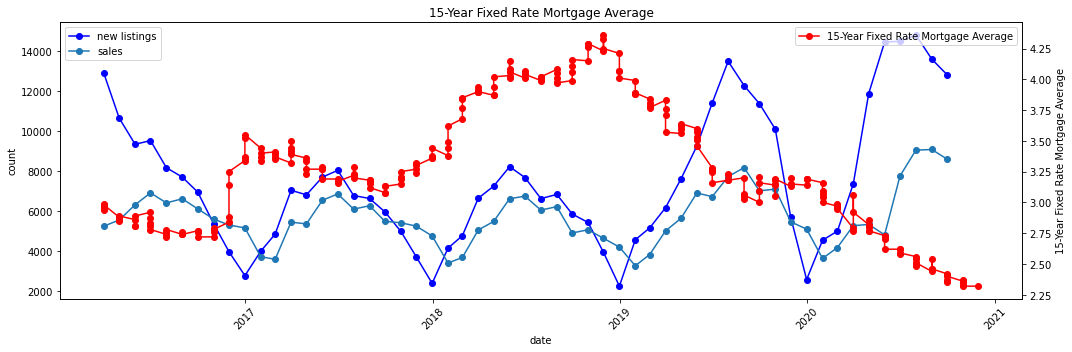

In [8]:
# weekly rates
econ_visual(m15_path, '15-Year Fixed Rate Mortgage Average', num_sl, diffy=True)

## 30-Year Fixed Rate Mortgage Average

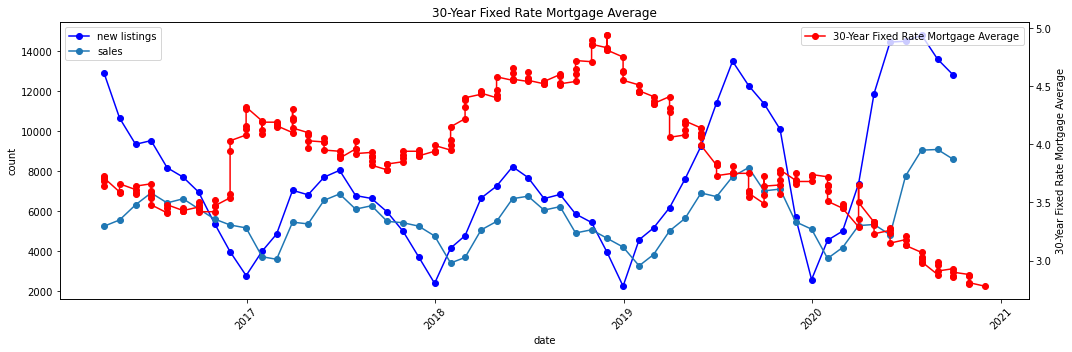

In [9]:
# weekly rates
econ_visual(m30_path, '30-Year Fixed Rate Mortgage Average', num_sl, diffy=True)

## 5/1-Year Adjustable Rate Mortgage Average in the United States

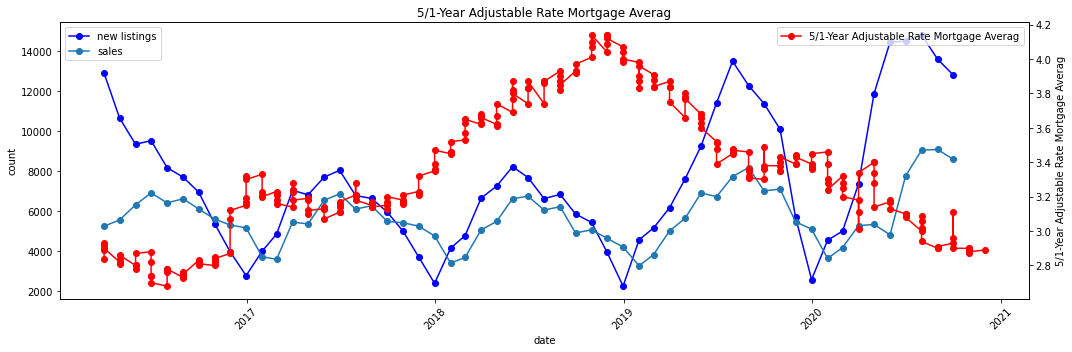

In [10]:
# weekly rates
econ_visual(m51_path, '5/1-Year Adjustable Rate Mortgage Averag', num_sl, diffy=True)

## Unemplyment Rate

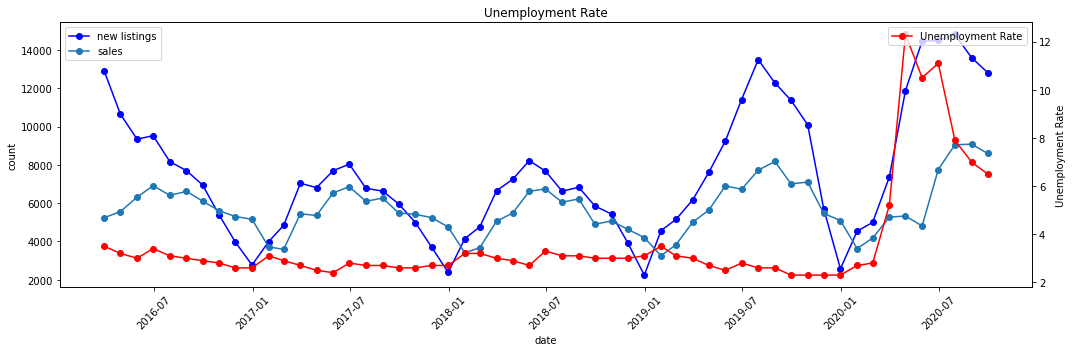

In [11]:
econ_visual(unemployment_path, 'Unemployment Rate', num_sl, diffy=True)

## New Private Housing Units Authorized by Building Permits for 1-Unit Structures

This series represents the total number of building permits for 1-unit structure types. The 1-unit structure type is a single-family home or house. A single-family home or house types include fully detached, semidetached (semidetached, side-by-side), row houses, and townhouses. For attached units, each must be separated from the adjacent unit by a ground-to-roof wall in order to be classified as a single-family structure. These units also must not share heating/air-conditioning systems or utilities. Units built on top of one another and those built side-by-side that do not have a ground-to-roof wall and/or have common facilities (i.e., attic, basement, heating plant, plumbing, etc.) are not included under single-family structures.

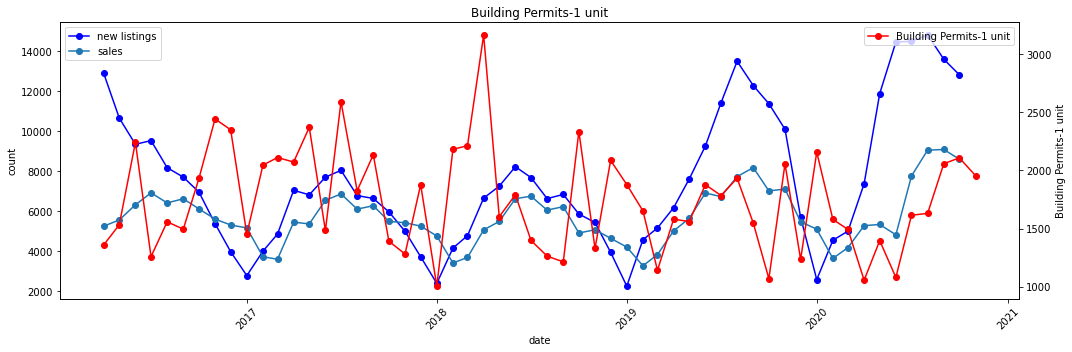

In [12]:
econ_visual(building_path, 'Building Permits-1 unit', num_sl, diffy=True)

## New Private Housing Structures Authorized by Building Permits

This series represents the total number of building permits for all structure types. Structure types include 1-unit, 2-unit, 3-unit, 4-unit, and 5-unit or more.

The Federal Reserve Bank of St. Louis seasonally adjusts this series by using the 'statsmodel' library from Python with default parameter settings. The package uses the U.S. Bureau of the Census X-13ARIMA-SEATS Seasonal Adjustment Program. More information on the 'statsmodel' X-13ARIMA-SEATS package can be found here. More information on X-13ARIMA-SEATS can be found here.


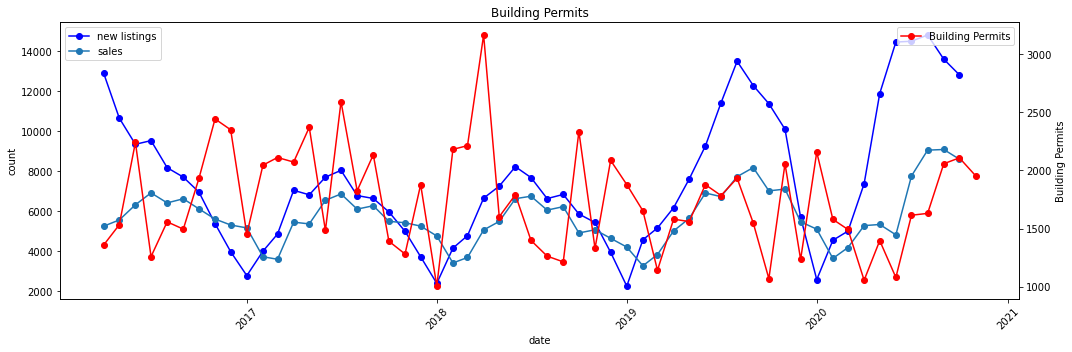

In [13]:
econ_visual(building_path, 'Building Permits', num_sl, diffy=True)

# Housing Market Indicators

## New Listing (Data Quality Assurance Check)

The count of new listings added to the market in a given geography during the month.

Suggested Citation:

Realtor.com, Housing Inventory: New Listing Count in Denver-Aurora-Lakewood, CO (CBSA) [NEWLISCOU19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/NEWLISCOU19740, November 7, 2020.

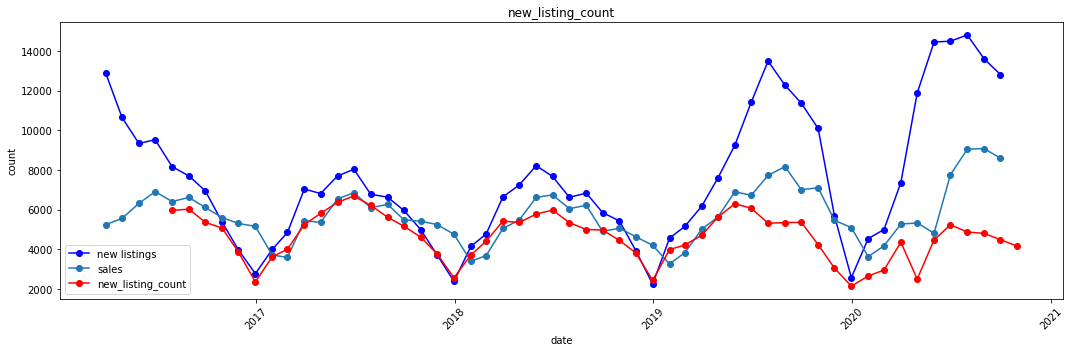

In [14]:
housing_visual(housing_metric_path, 'new_listing_count', num_sl)

## Active Listing

The count of active single-family and condo/townhome listings for a given market during the specified month (excludes pending listings).

Suggested Citation:

Realtor.com, Housing Inventory: Active Listing Count in Denver-Aurora-Lakewood, CO (CBSA) [ACTLISCOU19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/ACTLISCOU19740, November 8, 2020.

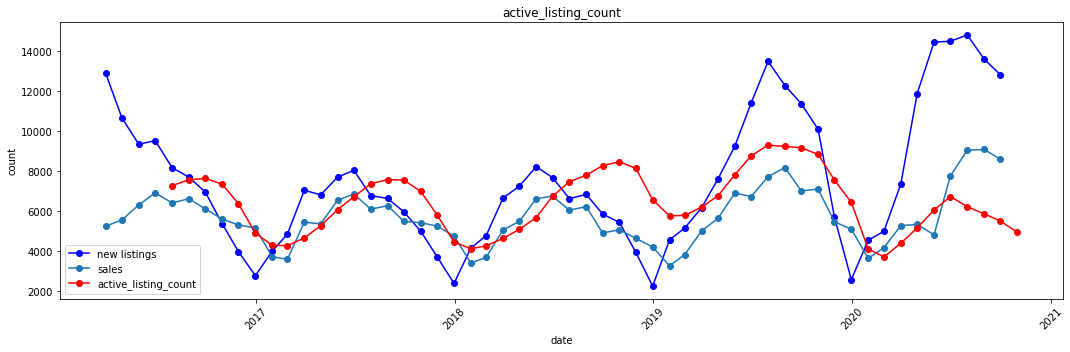

In [15]:
housing_visual(housing_metric_path, 'active_listing_count', num_sl)

## Price Increased Count

The count of listings which have had their price increased in a given market during the month.

Suggested Citation:

Realtor.com, Housing Inventory: Price Increased Count in Denver-Aurora-Lakewood, CO (CBSA) [PRIINCCOU19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PRIINCCOU19740, November 8, 2020.

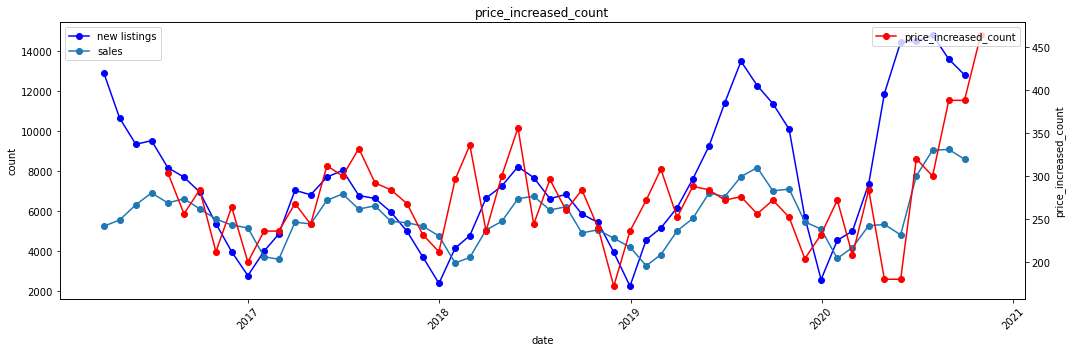

In [16]:
housing_visual(housing_metric_path, 'price_increased_count', num_sl, diffy=True)

## Price Decreasd Count

The count of listings which have had their price reduced in a given market during the month.

Suggested Citation:

Realtor.com, Housing Inventory: Price Reduced Count in Denver-Aurora-Lakewood, CO (CBSA) [PRIREDCOU19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PRIREDCOU19740, November 8, 2020.

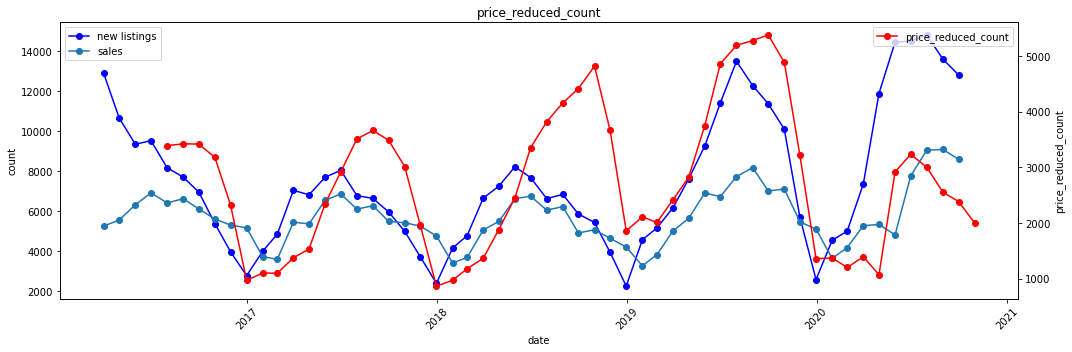

In [17]:
housing_visual(housing_metric_path, 'price_reduced_count', num_sl, diffy=True)

## Average Listing Price

The average listing price in a given market during the specified month.

Suggested Citation:

Realtor.com, Housing Inventory: Average Listing Price in Denver-Aurora-Lakewood, CO (CBSA) [AVELISPRI19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/AVELISPRI19740, November 8, 2020.

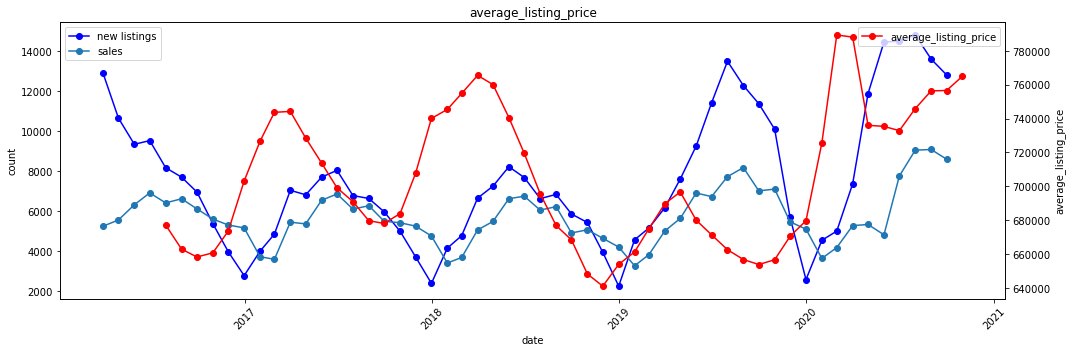

In [18]:
housing_visual(housing_metric_path, 'average_listing_price', num_sl, diffy=True)

## Median Listing Price

The median listing price in a given market during the specified month.

Suggested Citation:

Realtor.com, Housing Inventory: Median Listing Price in Denver-Aurora-Lakewood, CO (CBSA) [MEDLISPRI19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MEDLISPRI19740, November 8, 2020.

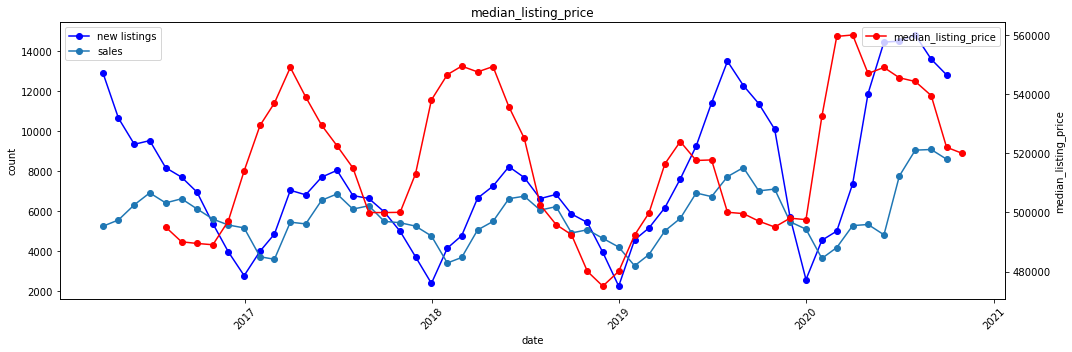

In [19]:
housing_visual(housing_metric_path, 'median_listing_price', num_sl, diffy=True)

## Median Listing Price Per Square Feet

The median listing price in a given market during the specified month.

Suggested Citation:

Realtor.com, Housing Inventory: Median Listing Price in Denver-Aurora-Lakewood, CO (CBSA) [MEDLISPRI19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MEDLISPRI19740, November 8, 2020.

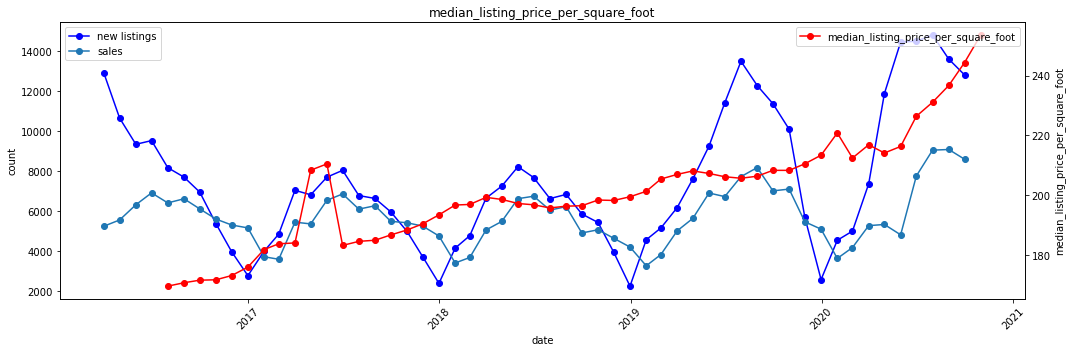

In [20]:
housing_visual(housing_metric_path, 'median_listing_price_per_square_foot', num_sl, diffy=True)

## Median Days On the Market

The median number of days property listings spend on the market in a given geography during the specified month (calculated from list date to closing, pending, or off-market date depending on data availability).



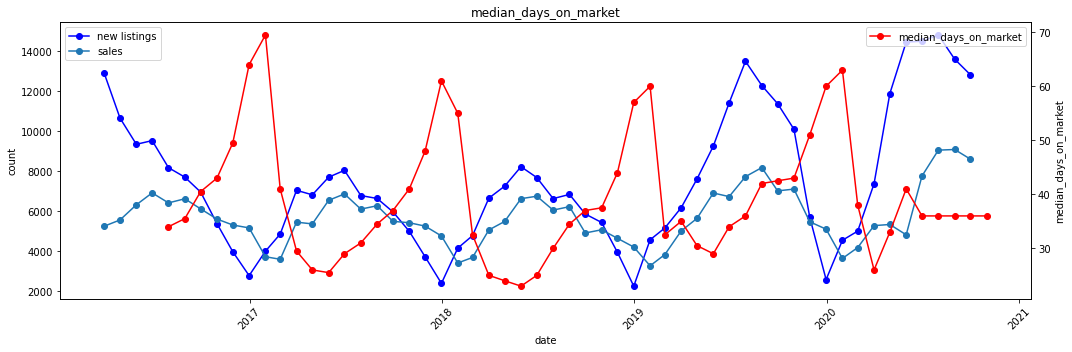

In [21]:
housing_visual(housing_metric_path, 'median_days_on_market', num_sl, diffy=True)

## Median Home Size in Square Feet

The median home size in square feet for listings in a given market during the specified month.

Suggested Citation:

Realtor.com, Housing Inventory: Median Home Size in Square Feet in Denver-Aurora-Lakewood, CO (CBSA) [MEDSQUFEE19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MEDSQUFEE19740, November 8, 2020.

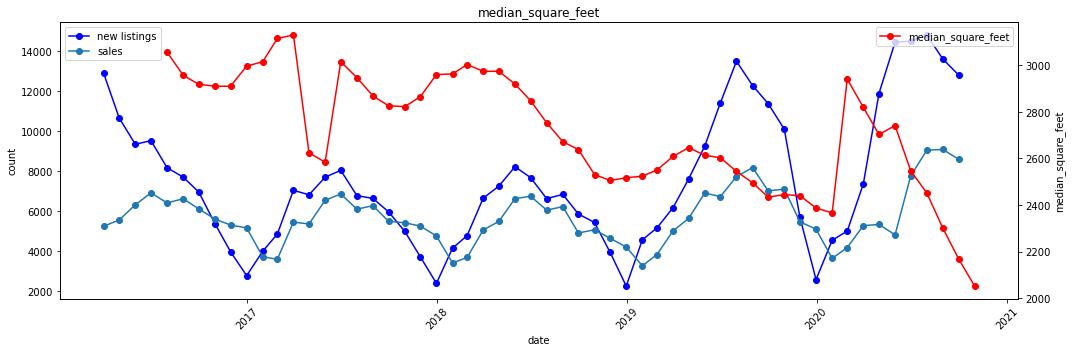

In [22]:
housing_visual(housing_metric_path, 'median_square_feet', num_sl, diffy=True)

## Market Hotness: Demand Score

The demand score is an index representing a market's average listing views on realtor.com relative to other markets.

Suggested Citation:

Realtor.com, Market Hotness: Demand Score in Denver-Aurora-Lakewood, CO (CBSA) [DESCMSA19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DESCMSA19740, November 8, 2020.

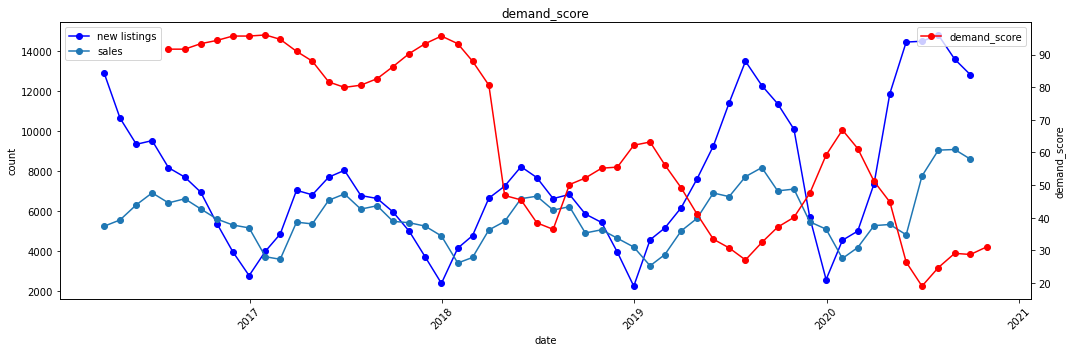

In [23]:
housing_visual(housing_hotness_path, 'demand_score', num_sl, diffy=True)

## Market Hotness: Supply Score

The supply score is an index representing a zip code, county or metro's median days on market ranking compared to other zip codes, counties or metros.

Suggested Citation:

Realtor.com, Market Hotness: Supply Score in Denver-Aurora-Lakewood, CO (CBSA) [SUSCMSA19740], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/SUSCMSA19740, November 8, 2020.

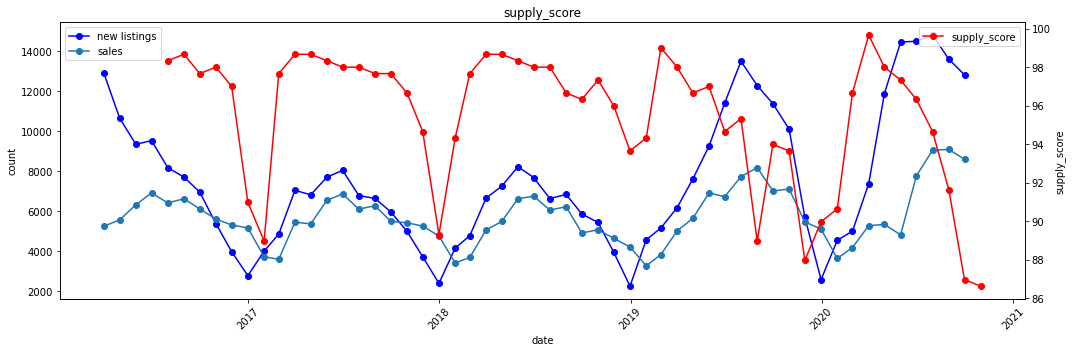

In [24]:
housing_visual(housing_hotness_path, 'supply_score', num_sl, diffy=True)